In [1]:
import geopandas as gpd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
#part 2

# Recreating windfield risk analysis

In this lesson, we are replicating the windfield risk analysis presented by Chad Council in his lecture. We will be using two main data sets:
- The wind field for the [1938 new england hurricane](https://en.wikipedia.org/wiki/1938_New_England_hurricane)
- The [CDC Social Vulnerability Index (SVI) for 2018](https://svi.cdc.gov/data-and-tools-download.html)
This analysis will see which areas are at highest risk due to wind damage if the 1938 hurricane hit today

In [2]:
# unzip windfield into a folder called windfield
#!unzip WindField.zip -d windfield

Archive:  WindField.zip
 extracting: windfield/WindField.cpg  
  inflating: windfield/WindField.dbf  
  inflating: windfield/WindField.prj  
  inflating: windfield/WindField.qpj  
  inflating: windfield/WindField.shp  
  inflating: windfield/WindField.shx  


<Axes: >

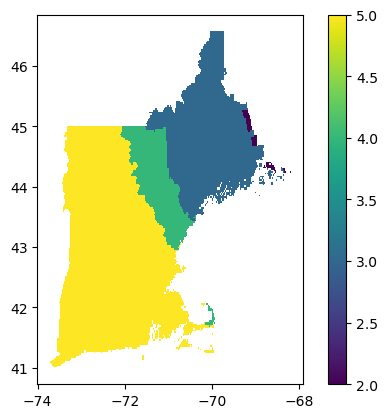

In [3]:
# load windfield into gpd geodataframe, plot the gridcode (wind speed rating: higher is more dangerous)
windfield_df = gpd.read_file('windfield/WindField.shp')
windfield_df.plot('GRIDCODE', legend=True)

The social vulnerability index data is hosted on our file server.
The documentation for the dataset has been included in this repository in `SVI2018Documentation.pdf` for ease of reference. It documents each column, and the data sources that were used to compute the respective entry.

In [5]:
#!wget https://files.bwsi-remote-sensing.net/data/SVI2020_US_tract.gdb.zip

--2024-07-17 18:30:06--  https://files.bwsi-remote-sensing.net/data/SVI2020_US_tract.gdb.zip
Resolving files.bwsi-remote-sensing.net (files.bwsi-remote-sensing.net)... 54.200.236.3, 44.234.198.52, 35.82.230.83, ...
Connecting to files.bwsi-remote-sensing.net (files.bwsi-remote-sensing.net)|54.200.236.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64955310 (62M) [application/zip]
Saving to: ‘SVI2020_US_tract.gdb.zip’

SVI2020_US_tract.gd 100%[===================>]  61.95M   150MB/s    in 0.4s    

2024-07-17 18:30:06 (150 MB/s) - ‘SVI2020_US_tract.gdb.zip’ saved [64955310/64955310]



In [6]:
# load SVI2018 from course shared folder
svi_df = gpd.read_file('SVI2020_US_tract.gdb.zip')
svi_df

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,...,MP_AIAN,EP_NHPI,MP_NHPI,EP_TWOMORE,MP_TWOMORE,EP_OTHERRACE,MP_OTHERRACE,Shape_Length,Shape_Area,geometry
0,01,Alabama,AL,01001,Autauga,01001020100,"Census Tract 201, Autauga County, Alabama",3.793570,1941,390,...,1.8,0.0,1.8,6.6,5.1,0.0,1.8,0.150118,0.000949,"MULTIPOLYGON (((-86.5091 32.47349, -86.50577 3..."
1,01,Alabama,AL,01001,Autauga,01001020200,"Census Tract 202, Autauga County, Alabama",1.282174,1757,310,...,2.0,0.0,2.0,2.6,3.0,0.8,1.1,0.092328,0.000318,"MULTIPOLYGON (((-86.48093 32.48154, -86.47945 ..."
2,01,Alabama,AL,01001,Autauga,01001020300,"Census Tract 203, Autauga County, Alabama",2.065364,3694,570,...,0.9,0.0,0.9,1.8,2.3,0.0,0.9,0.100175,0.000516,"MULTIPOLYGON (((-86.47087 32.47573, -86.46964 ..."
3,01,Alabama,AL,01001,Autauga,01001020400,"Census Tract 204, Autauga County, Alabama",2.464984,3539,500,...,0.5,0.0,1.0,2.9,2.8,0.0,1.0,0.113935,0.000607,"MULTIPOLYGON (((-86.45394 32.49318, -86.45308 ..."
4,01,Alabama,AL,01001,Autauga,01001020501,"Census Tract 205.01, Autauga County, Alabama",2.395243,4306,662,...,0.8,0.0,0.8,0.3,0.6,0.0,0.8,0.108866,0.000597,"MULTIPOLYGON (((-86.43816 32.45069, -86.43773 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84117,56,Wyoming,WY,56043,Washakie,56043000200,"Census Tract 2, Washakie County, Wyoming",2231.951436,3124,198,...,0.1,0.0,1.1,1.6,1.8,0.0,1.1,4.553260,0.648657,"MULTIPOLYGON (((-108.55063 44.15179, -108.5505..."
84118,56,Wyoming,WY,56043,Washakie,56043000301,"Census Tract 3.01, Washakie County, Wyoming",0.769579,2231,273,...,0.3,0.0,1.6,5.6,3.8,1.4,1.5,0.062798,0.000224,"MULTIPOLYGON (((-107.96833 44.0086, -107.96412..."
84119,56,Wyoming,WY,56043,Washakie,56043000302,"Census Tract 3.02, Washakie County, Wyoming",5.957251,2578,314,...,1.2,0.0,1.3,2.9,3.5,0.0,1.3,0.328656,0.001806,"MULTIPOLYGON (((-107.99537 43.98005, -107.9931..."
84120,56,Wyoming,WY,56045,Weston,56045951100,"Census Tract 9511, Weston County, Wyoming",2355.222335,3276,280,...,0.1,0.0,1.1,6.1,4.1,0.0,1.1,4.006506,0.683039,"MULTIPOLYGON (((-105.08078 43.96622, -105.0792..."


The overall vulnerability score is given in the column `RPL_THEMES`. Values of `-999` indicate missing data. Higher values (closer to 1) are higher vulnerability. Lower values (closer to 0) are less vulnerable.

In [8]:
svi_df['RPL_THEMES']

0        0.2823
1        0.5406
2        0.5042
3        0.2703
4        0.3343
          ...  
84117    0.4536
84118    0.5076
84119    0.5442
84120    0.6147
84121    0.3691
Name: RPL_THEMES, Length: 84122, dtype: float64

In [9]:
# replace missing data with None values
svi_df['RPL_THEMES'] = svi_df['RPL_THEMES'].replace({-999:np.nan})

(-180.0, -60.0)

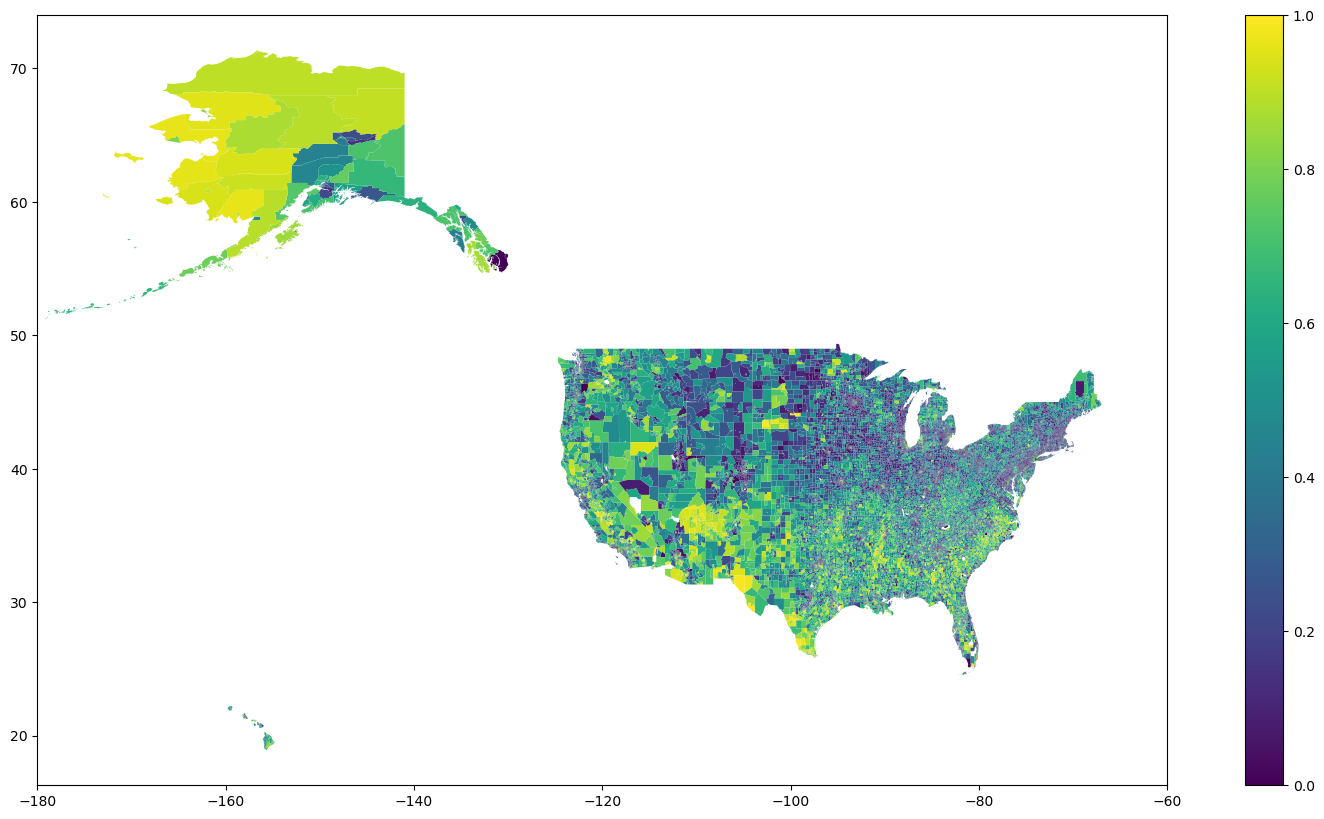

In [10]:
# take a look at overall SVI (takes a minute to run because it's the whole country)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
svi_df.dropna(subset=['RPL_THEMES']).plot('RPL_THEMES', legend=True, ax=ax)
ax.set_xlim([-180,-60])

To combine the two data sets, we will use a powerful function called a "spatial join". Recall the database joins from lesson 1: they merge dataframes based on shared values in a column.

For geodataframes, we can do something similar using the geometry column: we can merge dataframe rows based on how their respective geometries interact with one another.

The function we use to do this is [`gpd.sjoin()`](https://geopandas.org/reference/geopandas.sjoin.html). Let's take a look at the function

In [11]:
gpd.sjoin?

Signature:
gpd.sjoin(
    left_df,
    right_df,
    how='inner',
    predicate='intersects',
    lsuffix='left',
    rsuffix='right',
    distance=None,
    on_attribute=None,
    **kwargs,
)
Docstring:
Spatial join of two GeoDataFrames.

See the User Guide page :doc:`../../user_guide/mergingdata` for details.


Parameters
----------
left_df, right_df : GeoDataFrames
how : string, default 'inner'
    The type of join:

    * 'left': use keys from left_df; retain only left_df geometry column
    * 'right': use keys from right_df; retain only right_df geometry column
    * 'inner': use intersection of keys from both dfs; retain only
      left_df geometry column
predicate : string, default 'intersects'
    Binary predicate. Valid values are determined by the spatial index used.
    You can check the valid values in left_df or right_df as
    ``left_df.sindex.valid_query_predicates`` or
    ``right_df.sindex.valid_query_predicates``
    Replaces deprecated ``op`` parameter.
lsuffix : str

There are three important sets of arguments for the function:
- left and right geodataframes
- 'how': what kind of join: left, right, or inner
- 'op': what kind of spatial interaction between the geometries

In [14]:
joined_df = gpd.sjoin(svi_df, windfield_df, how='inner') #op=intersects no longer used, inner already specifies this
joined_df

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,...,MP_TWOMORE,EP_OTHERRACE,MP_OTHERRACE,Shape_Length,Shape_Area,geometry,index_right,OBJECTID,ID,GRIDCODE
14757,09,Connecticut,CT,09001,Fairfield,09001010101,"Census Tract 101.01, Fairfield County, Connect...",12.650886,4192,524,...,0.7,0.0,0.9,0.273055,0.003533,"MULTIPOLYGON (((-73.72777 41.1007, -73.71229 4...",68,69.0,69.0,5.0
14758,09,Connecticut,CT,09001,Fairfield,09001010102,"Census Tract 101.02, Fairfield County, Connect...",12.594483,4419,721,...,2.2,0.0,0.8,0.255551,0.003647,"MULTIPOLYGON (((-73.66985 41.12309, -73.66864 ...",68,69.0,69.0,5.0
14759,09,Connecticut,CT,09001,Fairfield,09001010201,"Census Tract 102.01, Fairfield County, Connect...",4.345600,3429,493,...,1.1,0.0,1.1,0.184352,0.001223,"MULTIPOLYGON (((-73.65501 41.06846, -73.65043 ...",68,69.0,69.0,5.0
14760,09,Connecticut,CT,09001,Fairfield,09001010202,"Census Tract 102.02, Fairfield County, Connect...",3.801528,5660,558,...,8.3,0.2,0.2,0.149078,0.001070,"MULTIPOLYGON (((-73.60704 41.05393, -73.60488 ...",68,69.0,69.0,5.0
14761,09,Connecticut,CT,09001,Fairfield,09001010300,"Census Tract 103, Fairfield County, Connecticut",3.720638,3880,419,...,1.7,0.0,1.0,0.165516,0.001035,"MULTIPOLYGON (((-73.66336 41.04169, -73.66221 ...",68,69.0,69.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77924,50,Vermont,VT,50027,Windsor,50027966501,"Census Tract 9665.01, Windsor County, Vermont",55.620130,3036,16,...,0.1,0.9,1.0,0.510987,0.016032,"MULTIPOLYGON (((-72.68103 43.32211, -72.67949 ...",68,69.0,69.0,5.0
77925,50,Vermont,VT,50027,Windsor,50027966502,"Census Tract 9665.02, Windsor County, Vermont",64.354904,1067,141,...,3.8,0.0,2.1,0.614283,0.018566,"MULTIPOLYGON (((-72.8651 43.34702, -72.86602 4...",68,69.0,69.0,5.0
77926,50,Vermont,VT,50027,Windsor,50027966600,"Census Tract 9666, Windsor County, Vermont",27.073180,4633,401,...,2.6,0.0,0.5,0.407089,0.007847,"MULTIPOLYGON (((-72.54825 43.27958, -72.54801 ...",68,69.0,69.0,5.0
77927,50,Vermont,VT,50027,Windsor,50027966700,"Census Tract 9667, Windsor County, Vermont",22.139945,4302,401,...,1.1,0.1,0.2,0.401866,0.006426,"MULTIPOLYGON (((-72.54545 43.34525, -72.54544 ...",68,69.0,69.0,5.0


<Axes: >

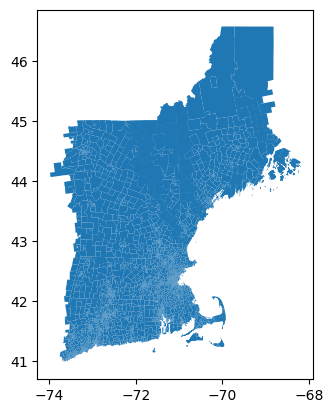

In [15]:
# we can see the shape of the joined dataframe: it only includes the intersection of the two datasets
# at a census-tract level
joined_df.plot()

To compute the wind-vulnerability score, we just multiply the respective columns:


In [16]:
joined_df['wind_vulnerability'] = joined_df['RPL_THEMES'] * joined_df['GRIDCODE']

<Axes: >

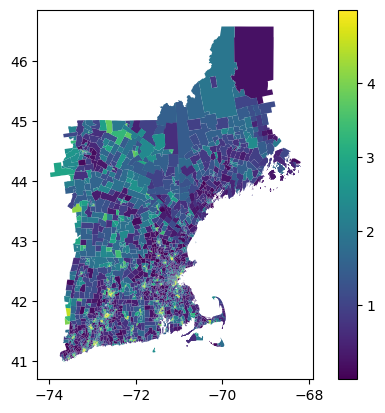

In [17]:
joined_df.plot('wind_vulnerability', legend=True)